In [2]:
# add matplotlib inline magic command
%matplotlib inline

In [3]:
# add Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# files to load
city_data_to_load = "../Resources/city_data.csv"


# Read the files
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# file to load
ride_data_to_load = "../Resources/ride_data.csv"

# Read the file
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# get the number of data points from the URBAN Cities
sum(city_data_df["type"]=="Urban")

66

In [11]:
# get the number of data points from Suburban 
sum(city_data_df["type"]=="Suburban")

36

In [12]:
# get the number of data points from Rural 
sum(city_data_df["type"]=="Rural")

18

In [13]:
# RIDE data columns and rows not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Ride data columns and rows not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# get RIDE data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# display the DF
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Urban city DATAFRAME
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]

In [18]:
# Create the SUBRBAN city DATAFRAME
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [19]:
# create the RURAL DataFRAME
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
# get the number of rides for urban cities. DATA SERIES!
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [21]:
 # Suburban rider numbers DATA SERIES
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [22]:
# Rural rider count DATA SERIES
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [23]:
# calculate avg fare for each city in urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
# average fare Suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [25]:
# avg fare for RURal cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [26]:
# avg # of drivers urban cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [27]:
# avg # of drivers in suburban cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [28]:
# avg driver count rural cities
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

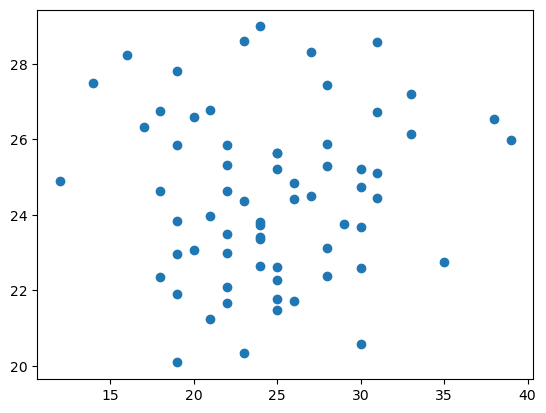

In [29]:
# urban scatter plot. 
# x-axis is # of rides each city
# y-axis average fare for each city
# size of bubble is average number of drivers in each city
plt.scatter(urban_ride_count, urban_avg_fare)


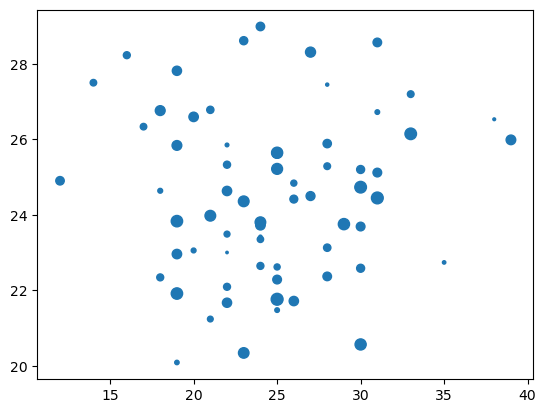

In [30]:
# add different size bubbles for driver count
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=urban_driver_count)

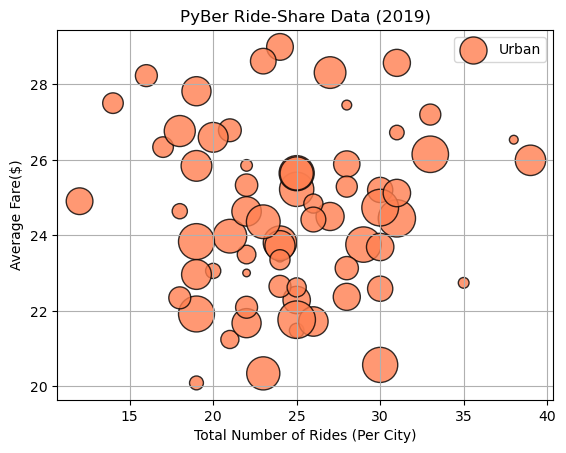

In [31]:
# add labels and diff colors
# build the scatter, size of buble 10*
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,
           c="coral",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Urban")

# Add titles and labels
plt.title("PyBer Ride-Share Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
 
#Add legend
plt.legend()

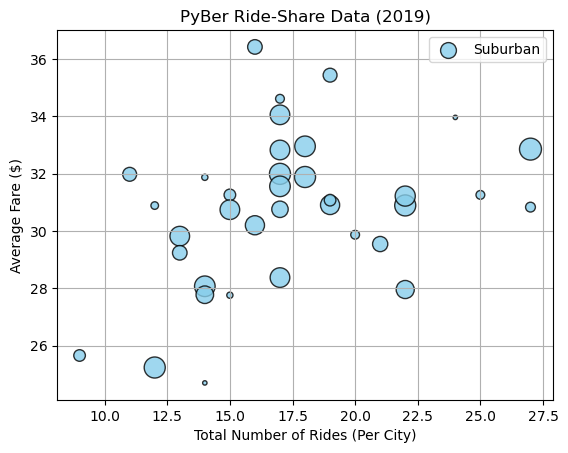

In [32]:
#Build Suburban scatter similar to urban
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")

plt.title("PyBer Ride-Share Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

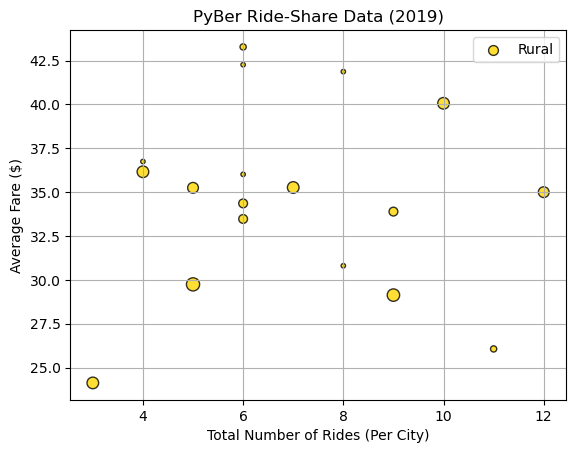

In [33]:
#Build Rural scatter similar to urban
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,
           c="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")

plt.title("PyBer Ride-Share Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

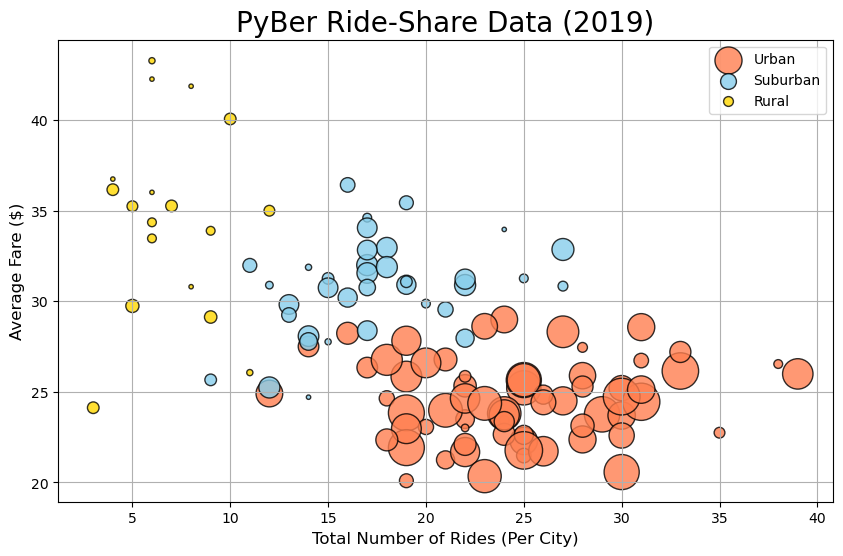

In [34]:
##COMBINE ALL THREE SCATTER PLOTS TOGETHER!!! COOL

#Make the graph bigger
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,
           c="coral",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,
           c="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")

#increase title size
plt.title("PyBer Ride-Share Data (2019)", fontsize=20)
#increase label size
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
plt.legend()

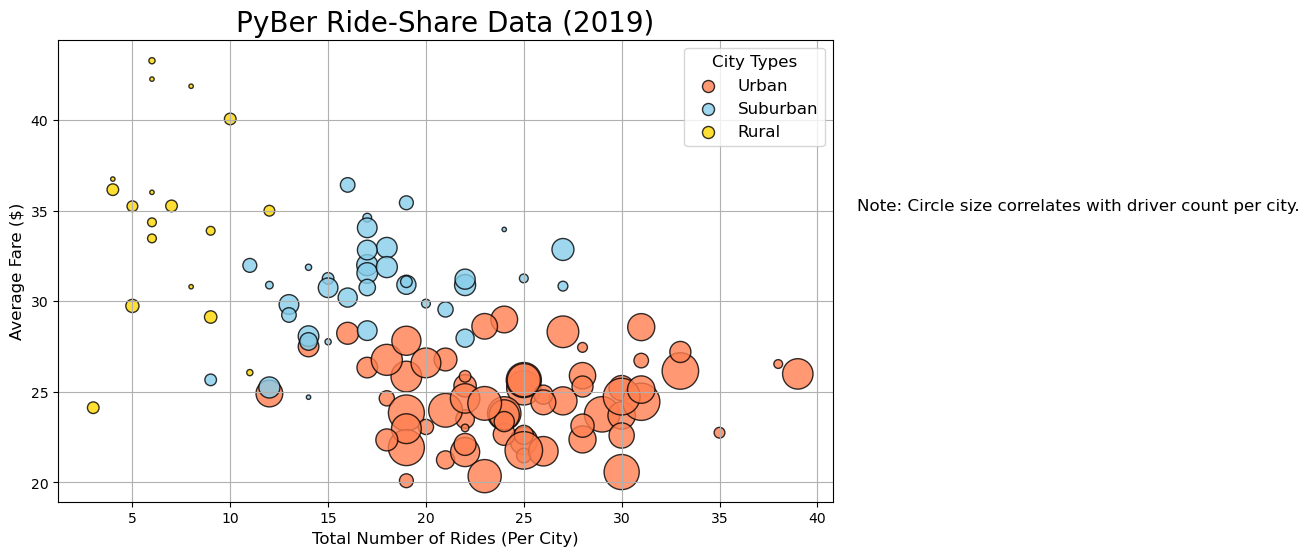

In [35]:
# notice above it auto sized the legend!!! Lets fix that
##COMBINE ALL THREE SCATTER PLOTS TOGETHER!!! COOL

#Make the graph bigger
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,
           c="coral",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,
           c="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")

#increase title size
plt.title("PyBer Ride-Share Data (2019)", fontsize=20)
#increase label size
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#Create an awesome legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap=True)

# save the figure
plt.savefig("./ Scatter_city_drivers.png")

In [36]:
# Get summary statistics 
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [37]:
# Summary stats
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [38]:
# Summanry stats
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [39]:
# Summary stats on ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [40]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [41]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [42]:
# calculate mean of ride count for each city. rounded to two decimals
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [43]:
# calculate median ride count for each city
(urban_ride_count.median()), (suburban_ride_count.median()), (rural_ride_count.median())

(24.0, 17.0, 6.0)

In [44]:
# find urban ride count mode
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [45]:
# find suburban ride count modde
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [46]:
# import mumpy and teh stats module from SciPy
import numpy as np
import scipy.stats as sts

In [47]:
# Urban ride count central tendency 
mean_urban_ride_count = np.mean(urban_ride_count)
print(f" The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f" The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f" The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

 The mean for the ride counts for urban trips is 24.62.
 The median for the ride counts for urban trips is 24.00.
 The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\2781899330.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_ride_count = sts.mode(urban_ride_count)


In [48]:
# suburban mode. 
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f" The mode for the ride counts for suburban trips is {mode_suburban_ride_count}")
      

 The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\1667629895.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburban_ride_count = sts.mode(suburban_ride_count)


In [49]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f" The mode for the ride counts for rural trips is {mode_rural_ride_count}")


 The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\698938947.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_ride_count = sts.mode(rural_ride_count)


In [50]:
# Get the fares for the urban cities
# we just created a SERIES for URBAN FARES
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [51]:
# calculate centeal tendencey average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f" The mean fare price for urban trips is ${mean_urban_fares}")

median_urban_fares = np.median(urban_fares)
print(f" The median fare price for urban trips is ${median_urban_fares}")

mode_urban_fares = sts.mode(urban_fares)
print(f" The mode fare price for urban trips is ${mode_urban_fares}")

 The mean fare price for urban trips is $24.52577230769236
 The median fare price for urban trips is $24.64
 The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\1509469109.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_fares = sts.mode(urban_fares)


In [52]:
# Suburban fares Series
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [53]:
# Calculate centreal tendencies average fare for Suburban cities
mean_suburban_fare = np.mean(suburban_fares)
print(f" The mean fare price for suburban trips is ${mean_suburban_fare}")

median_suburban_fare = np.median(suburban_fares)
print(f" The median fare price for suburban trips is ${median_suburban_fare}")

mode_suburban_fare = sts.mode(suburban_fares)
print(f" The mode fare price for suburban trips is ${mode_suburban_fare}")


 The mean fare price for suburban trips is $30.97012800000002
 The median fare price for suburban trips is $30.75
 The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3]))


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\3252308465.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburban_fare = sts.mode(suburban_fares)


In [54]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [55]:
# Central Tendancies for Rural Fare Series
mean_rural_fare = np.mean(rural_fares)
print(f" The mean fare price for rural trips is ${mean_rural_fare}")

median_rural_fare = np.median(rural_fares)
print(f" The median fare price for rural trips is ${median_rural_fare}")

mode_rural_fare = sts.mode(rural_fares)
print(f" The mode fare price for rural trips is ${mode_rural_fare}")

 The mean fare price for rural trips is $34.623440000000016
 The median fare price for rural trips is $37.05
 The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2]))


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\4156033709.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_fare = sts.mode(rural_fares)


In [56]:
# Driver count Series for each city type and Central Tendencies
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [57]:
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [58]:
rural_drivers = rural_cities_df["driver_count"]
rural_drivers

2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64

In [59]:
#Central tendancies DRIVER COUNT for each city type
mean_urban_driver = np.mean(urban_drivers)
print(f" The mean driver count for urban cities is {mean_urban_driver}")

median_urban_driver = np.median(urban_drivers)
print(f" The median driver count for urban cities is {median_urban_driver}")

mode_urban_driver = sts.mode(urban_drivers)
print(f" THe mode driver count for urban cities is {mode_urban_driver}")

 The mean driver count for urban cities is 36.67815384615385
 The median driver count for urban cities is 37.0
 THe mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86]))


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\465590846.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_driver = sts.mode(urban_drivers)


In [60]:
#Central tendancies DRIVER COUNT for each city type
mean_suburban_driver = np.mean(suburban_drivers)
print(f" The mean driver count for suburban cities is {mean_suburban_driver}")

median_suburban_driver = np.median(suburban_drivers)
print(f" The median driver count for suburban cities is {median_suburban_driver}")

mode_suburban_driver = sts.mode(suburban_drivers)
print(f" THe mode driver count for suburban cities is {mode_suburban_driver}")

 The mean driver count for suburban cities is 13.712
 The median driver count for suburban cities is 16.0
 THe mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79]))


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\2424995098.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburban_driver = sts.mode(suburban_drivers)


In [61]:
#Central tendancies DRIVER COUNT for each city type
mean_rural_driver = np.mean(rural_drivers)
print(f" The mean driver count for rural cities is {mean_rural_driver}")

median_rural_driver = np.median(rural_drivers)
print(f" The median driver count for rural cities is {median_rural_driver}")

mode_rural_driver = sts.mode(rural_drivers)
print(f" THe mode driver count for rural cities is {mode_rural_driver}")

 The mean driver count for rural cities is 4.296
 The median driver count for rural cities is 4.0
 THe mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32]))


C:\Users\amr_a\AppData\Local\Temp\ipykernel_26100\2698855348.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_driver = sts.mode(rural_drivers)


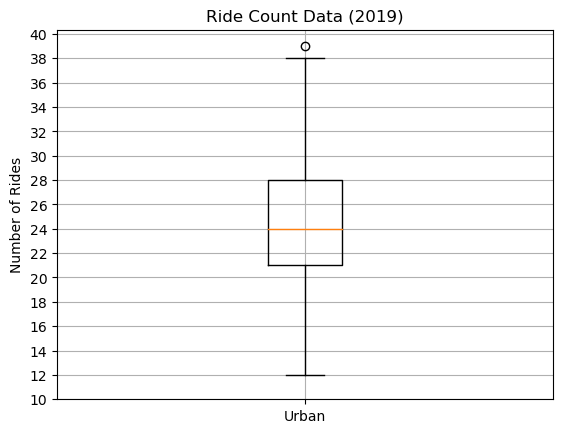

In [62]:
# Create a box and wisker plot bur urban cities ride count

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#Add title, labels and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()


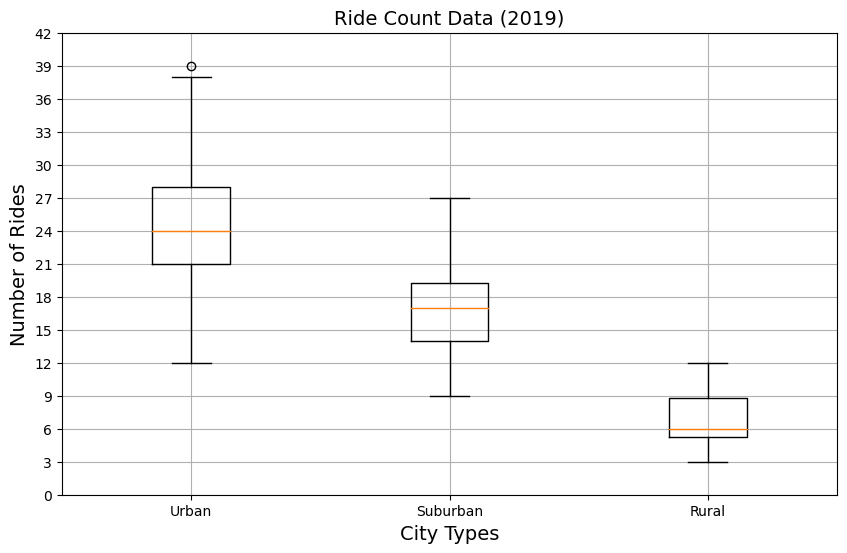

In [63]:
# Add all ride count box-shisker plots to same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

# create the plots and make graph bigger
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.))
ax.grid()

plt.savefig("analysis/Ride_count_Box_wisker")


In [64]:
# get the city that matches 39... the outlier shown in our graph above
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


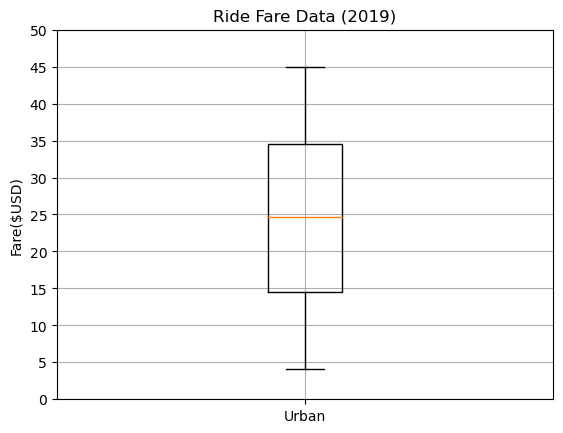

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [65]:
# create a box whisker for urban fare data

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#Add title and labels, grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

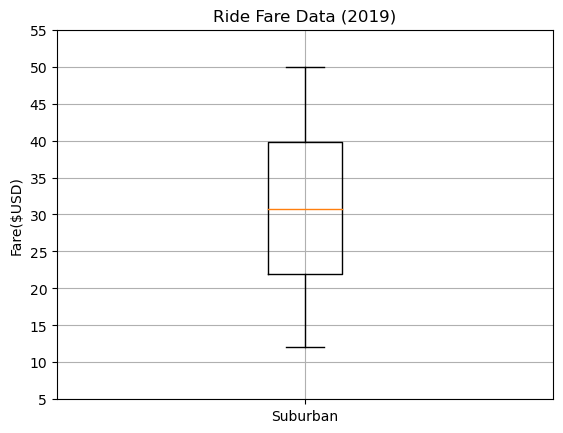

Stummary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [66]:
# Create a box whisker for Suburban fare data

x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#Add title, labels and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(5, 56, step=5.0))
ax.grid()
plt.show()
print("Stummary Statistics")
urban_fares.describe()

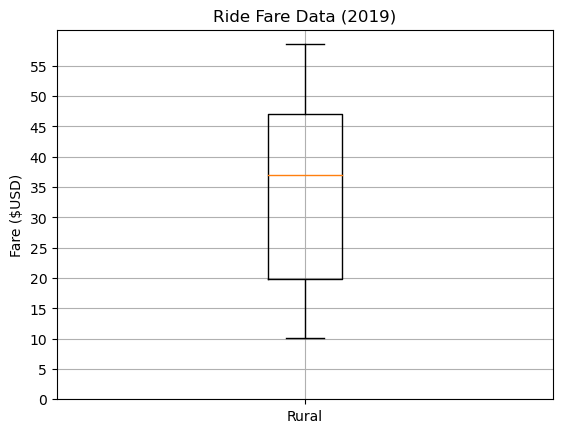

Summary Stataistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [67]:
# Create box whisker for Rural Fare data

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Title, labels, ticks and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
plt.show()
print("Summary Stataistics")
rural_fares.describe()

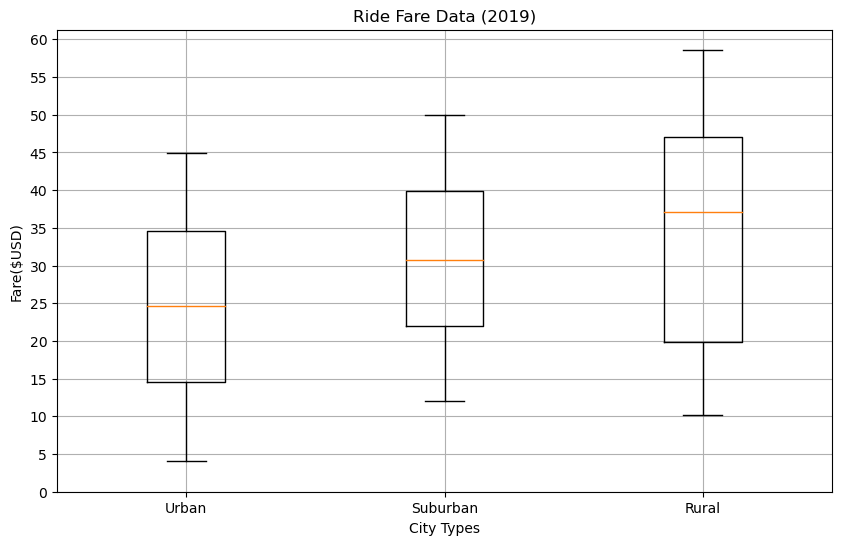

In [68]:
# Ride fare data box whisker for all three city types

x_label = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize=(10, 6))
fare_data = [urban_fares, suburban_fares, rural_fares]

#title, labels, ticks, girds
ax.boxplot(fare_data, labels=x_label)
ax.set_title("Ride Fare Data (2019)")
ax.set_xlabel("City Types")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
#plt.show()

plt.savefig("analysis/Ride_Fare_Fig3.png")

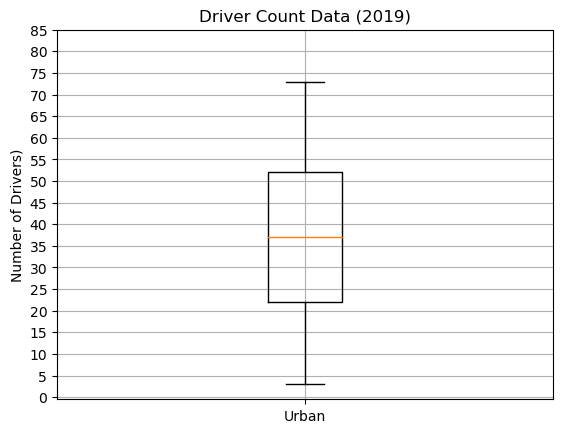

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [69]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

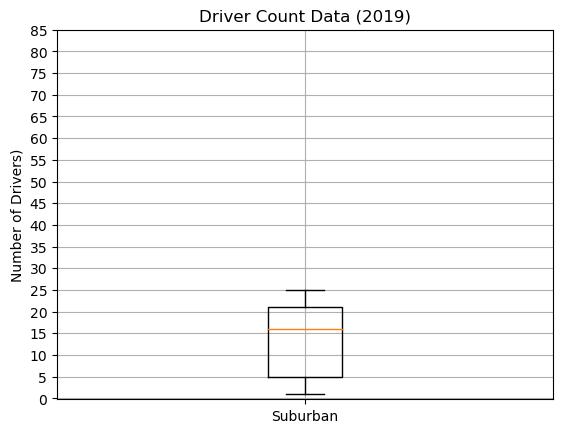

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [70]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

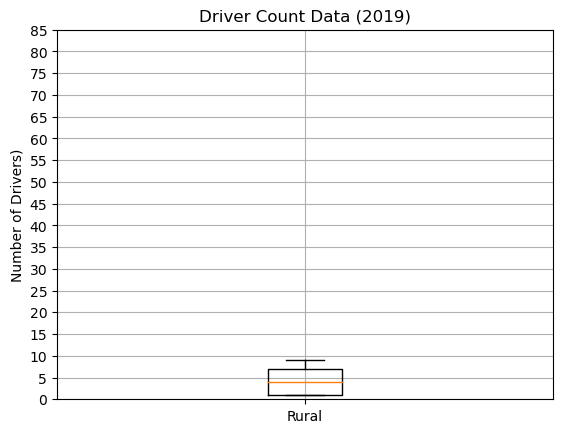

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [71]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

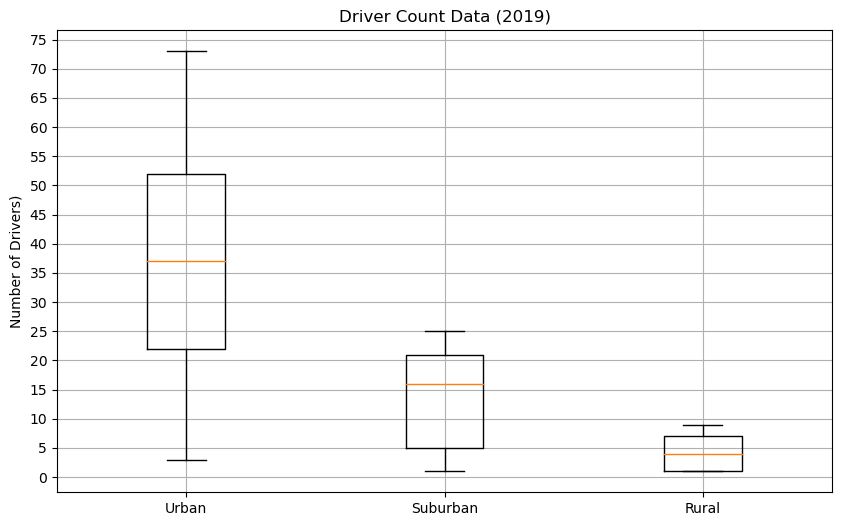

In [72]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('City Types')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
#plt.show()

plt.savefig('analysis/Driver_count_fig4.png')

In [74]:
# Get the sum of the fares for each city type
#This output is a SERIES
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [77]:
# sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [78]:
# percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [79]:
# ANother WAY !! to get percent of fare for each city type
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

Text(0.5, 1.0, '% of Total Fares by City Type')

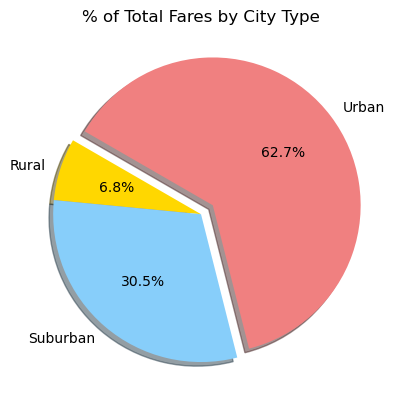

In [84]:
# PIE CHART ... build teh percentage of fares by city type 
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True,
       startangle=150)
plt.title("% of Total Fares by City Type")

#plt.show()

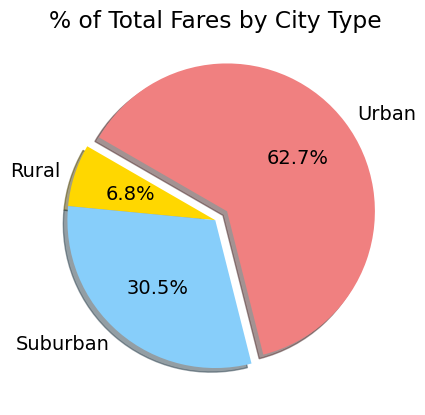

In [88]:
# change the font size... MUST IMPORT 
import matplotlib as mpl


# PIE CHART ... build the chart percentage of fares by city type 
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True,
       startangle=150)
plt.title("% of Total Fares by City Type")

# Change the defalt font size from 10 to 14
mpl.rcParams['font.size'] = 14

plt.savefig('analysis/Pie_total Fares fig 5.png')